In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                
    # return list of sparsity            
    return sparsity_list

In [4]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [5]:
def all_plotter(sorted_test_acc_list, sorted_sparsity_list, sorted_selectivity_average_list, nonsorted_test_acc_list, nonsorted_sparsity_list, nonsorted_selectivity_average_list, location='best'):
    fig, ax = plt.subplots(figsize=(20, 15))
    
    ax.plot(np.linspace(0.0, 100.0, num=100), sorted_test_acc_list, label='sorted test accuracy')
    ax.plot(np.linspace(0.0, 100.0, num=100), sorted_sparsity_list, label='sorted sparsity')
    ax.plot(np.linspace(0.0, 100.0, num=100), sorted_selectivity_average_list, label='sorted selectivity')
    
    ax.plot(np.linspace(0.0, 100.0, num=100), nonsorted_test_acc_list, label='original test accuracy')
    ax.plot(np.linspace(0.0, 100.0, num=100), nonsorted_sparsity_list, label='original sparsity')
    ax.plot(np.linspace(0.0, 100.0, num=100), nonsorted_selectivity_average_list, label='original selectivity')

    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

# Adagrad

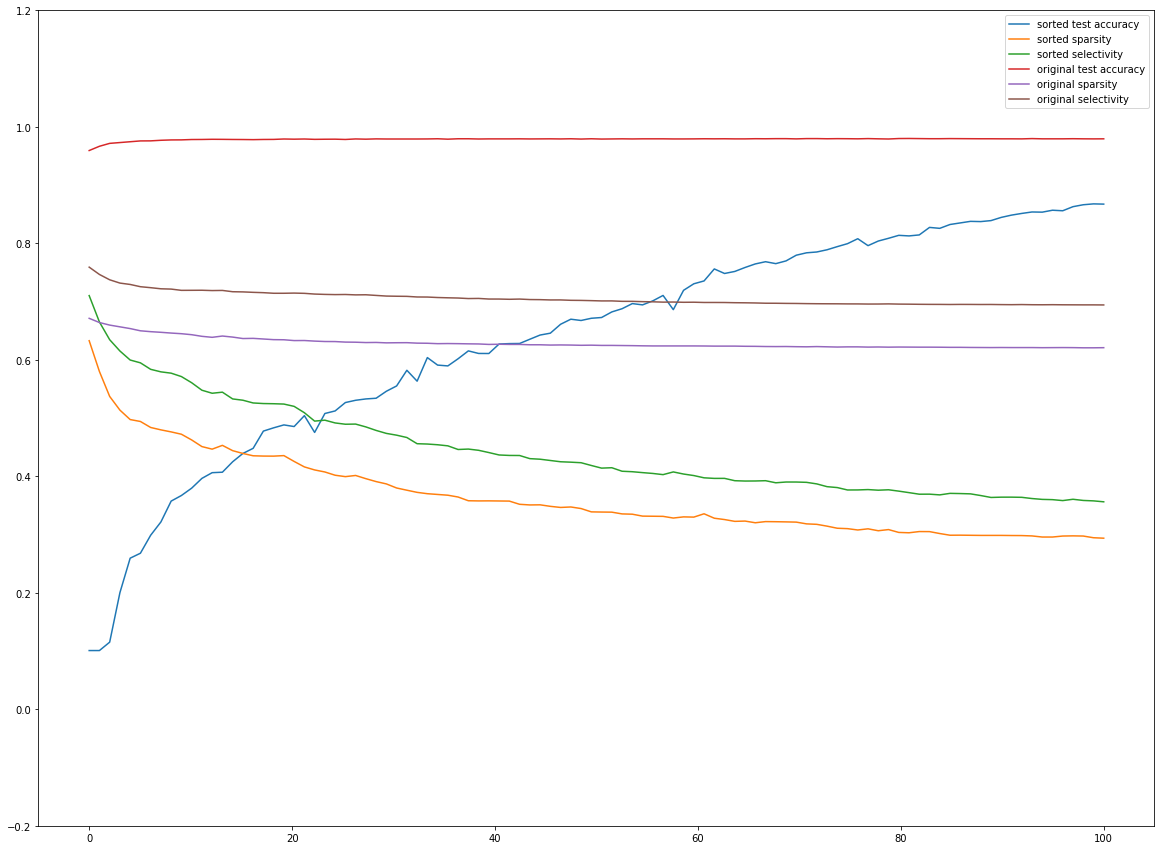

In [6]:
sorted_test_vals  = test_val_extractor('sorted_selectivity_Adagrad.txt')
sorted_sparsities = sparsity_val_extractor('sorted_sparsity_Adagrad.txt')
sorted_selectivity_average, sorted_selectivity_std = selectivity_val_extractor("sorted_selectivity_Adagrad.txt")

non_sorted_test_vals  = test_val_extractor('not_sorted_selectivity_Adagrad.txt')
non_sorted_sparsities = sparsity_val_extractor('not_sorted_sparsity_Adagrad.txt')
non_sorted_selectivity_average, non_sorted_selectivity_std = selectivity_val_extractor("not_sorted_selectivity_Adagrad.txt")

all_plotter(sorted_test_vals, sorted_sparsities, sorted_selectivity_average, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average)

# Adam

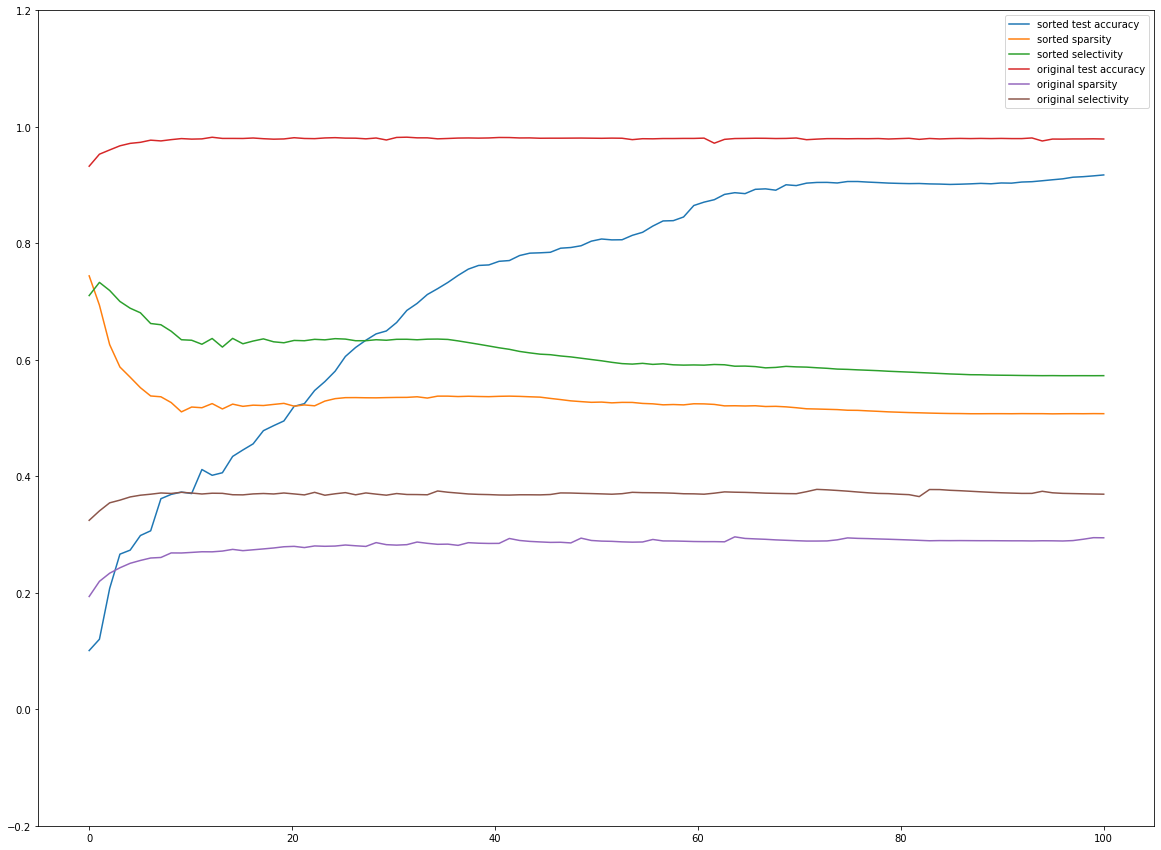

In [7]:
sorted_test_vals  = test_val_extractor('sorted_selectivity_Adam.txt')
sorted_sparsities = sparsity_val_extractor('sorted_sparsity_Adam.txt')
sorted_selectivity_average, sorted_selectivity_std = selectivity_val_extractor("sorted_selectivity_Adam.txt")

non_sorted_test_vals  = test_val_extractor('not_sorted_selectivity_Adam.txt')
non_sorted_sparsities = sparsity_val_extractor('not_sorted_sparsity_Adam.txt')
non_sorted_selectivity_average, non_sorted_selectivity_std = selectivity_val_extractor("not_sorted_selectivity_Adam.txt")

all_plotter(sorted_test_vals, sorted_sparsities, sorted_selectivity_average, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average)

# SGD

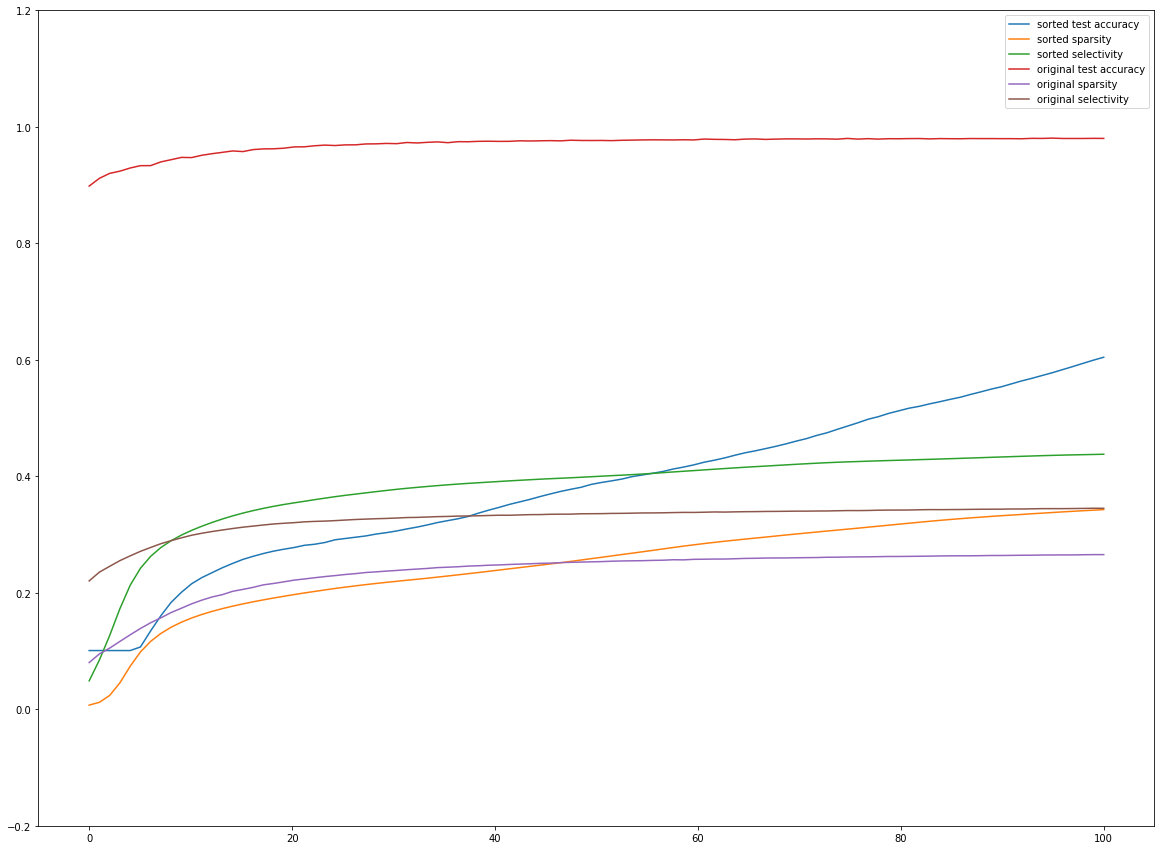

In [8]:
sorted_test_vals  = test_val_extractor('sorted_selectivity_SGD.txt')
sorted_sparsities = sparsity_val_extractor('sorted_sparsity_SGD.txt')
sorted_selectivity_average, sorted_selectivity_std = selectivity_val_extractor("sorted_selectivity_SGD.txt")

non_sorted_test_vals  = test_val_extractor('not_sorted_selectivity_SGD.txt')
non_sorted_sparsities = sparsity_val_extractor('not_sorted_sparsity_SGD.txt')
non_sorted_selectivity_average, non_sorted_selectivity_std = selectivity_val_extractor("not_sorted_selectivity_SGD.txt")

all_plotter(sorted_test_vals, sorted_sparsities, sorted_selectivity_average, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average)